In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.37'

In [4]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [5]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
file_ext='.txt'
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spectrum']
Diad_Files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str=exclude_str)
print(Diad_Files)

['Cap19-05X1.txt', 'Cap19-05X2.txt', 'Cap19-06X1.txt', 'Cap19-06X2.txt', 'Cap19-07X1.txt', 'Cap19-07X2.txt', 'Cap19-08X1.txt', 'Cap19-08X2.txt', 'Cap19-12X1.txt', 'Cap19-12X2.txt', 'Cap19-17X1.txt', 'Cap19-17X2.txt', 'Cap19-18X1.txt', 'Cap19-18X2.txt', 'FG04_31_MI.txt', 'FG04_31_MI3 (1).txt', 'FG04_31_MI3.txt', 'FG04_31_MI4 (1).txt', 'FG04_31_MI4.txt', 'POC1.txt', 'POC10.txt', 'POC11.txt', 'POC12.txt', 'POC13.txt', 'POC14.txt', 'POC15.txt', 'POC16.txt', 'POC17.txt', 'POC18.txt', 'POC19.txt', 'POC2.txt', 'POC20.txt', 'POC21.txt', 'POC22.txt', 'POC23.txt', 'POC24.txt', 'POC25.txt', 'POC26.txt', 'POC27.txt', 'POC28.txt', 'POC29.txt', 'POC3.txt', 'POC30.txt', 'POC31.txt', 'POC32.txt', 'POC33.txt', 'POC34.txt', 'POC35.txt', 'POC36.txt', 'POC37.txt', 'POC38.txt', 'POC39.txt', 'POC4.txt', 'POC40.txt', 'POC41.txt', 'POC42.txt', 'POC43.txt', 'POC44.txt', 'POC45.txt', 'POC46.txt', 'POC47.txt', 'POC48.txt', 'POC49.txt', 'POC5.txt', 'POC50 (Sub BG).txt', 'POC50.txt', 'POC51 (Sub BG).txt', 'POC51.t

### Tweak these parameters to make sure Scipy 'find_peaks' gets your diad peaks for your instrument

In [7]:
diad_id_config=pf.diad_id_config(height=10,  distance=5, prominence=15)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362), height=10, distance=5, threshold=0.5, width=0.5, prominence=15, plot_figure=True)

,filename,Diad2_HB2_prom_ratio,Diad1_HB1_prom_ratio,Diad2_pos,Diad2_prom,Diad1_pos,Diad1_prom,HB2_pos,HB2_prom,HB1_pos,...,C13_height,Diad1_height,HB1_height,Diad1_HB1_Valley_prom,Diad1_Median_Bck,Diad2_Median_Bck,approx_split,C13_HB2_prom_ratio,Mean_Diad_HB_Valley_prom,Mean_HB_prom
3,Cap19-05X1.txt,15.686513,11.650552,1389.651198,302.749985,1286.444974,216.699982,1410.359982,19.300018,1266.314725,...,NaN,935.0,735.799988,1.099976,718.300018,719.250015,103.206224,NaN,1.299957,37.899994


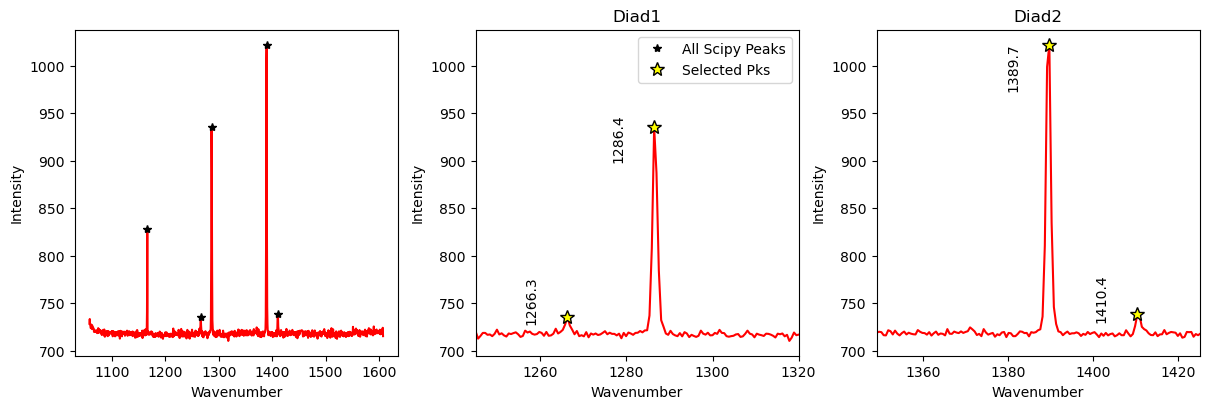

In [8]:
filetype='headless_txt'
df_peaks, Diad, fig=pf.identify_diad_peaks(
config=diad_id_config, 
path=spectra_path, filename=Diad_Files[0],
filetype=filetype, plot_figure=True)
df_peaks

In [9]:
df_peaks.columns

Index(['filename', 'Diad2_HB2_prom_ratio', 'Diad1_HB1_prom_ratio', 'Diad2_pos',
       'Diad2_prom', 'Diad1_pos', 'Diad1_prom', 'HB2_pos', 'HB2_prom',
       'HB1_pos', 'HB1_prom', 'C13_pos', 'C13_prom', 'Diad2_height',
       'HB2_height', 'Diad2_HB2_Valley_prom', 'C13_height', 'Diad1_height',
       'HB1_height', 'Diad1_HB1_Valley_prom', 'Diad1_Median_Bck',
       'Diad2_Median_Bck', 'approx_split', 'C13_HB2_prom_ratio',
       'Mean_Diad_HB_Valley_prom', 'Mean_HB_prom'],
      dtype='object')

In [10]:
fit_params, data_y_all=pf.loop_approx_fits(spectra_path=spectra_path, config=diad_id_config, 
                       Diad_Files=Diad_Files, filetype=filetype, plot_figure=False)
fit_params.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:01<00:00, 44.24it/s]


,filename,Diad2_HB2_prom_ratio,Diad1_HB1_prom_ratio,Diad2_pos,Diad2_prom,Diad1_pos,Diad1_prom,HB2_pos,HB2_prom,HB1_pos,...,C13_height,Diad1_height,HB1_height,Diad1_HB1_Valley_prom,Diad1_Median_Bck,Diad2_Median_Bck,approx_split,C13_HB2_prom_ratio,Mean_Diad_HB_Valley_prom,Mean_HB_prom
0,Cap19-05X1.txt,15.686513,11.650552,1389.651198,302.749985,1286.444974,216.699982,1410.359982,19.300018,1266.314725,...,724.799988,935.000000,735.799988,1.099976,718.300018,719.250015,103.206224,3.641521,1.299957,37.899994
1,Cap19-05X2.txt,11.304780,11.448878,1389.119077,283.750046,1286.444974,201.499970,1410.889851,25.100006,1266.314725,...,758.000000,950.799988,764.799988,-1.500000,749.300018,751.050003,102.674103,2.820227,-6.300018,42.699982
2,Cap19-06X1.txt,15.906544,13.955581,1389.119077,1506.349914,1285.901945,848.500000,1410.359982,94.700012,1265.769574,...,751.000000,1570.599976,780.400024,-1.700012,722.099976,723.049988,103.217132,4.265770,0.099976,155.500061
3,Cap19-06X2.txt,12.343853,11.608791,1389.119077,1897.249954,1286.444974,1056.399994,1410.359982,153.699982,1265.769574,...,788.200012,1813.599976,844.799988,-1.300018,757.199982,757.949997,102.674103,6.430955,-4.100037,244.699982
4,Cap19-07X1.txt,NaN,NaN,1389.651198,74.449997,1286.444974,42.299988,NaN,NaN,NaN,...,NaN,760.599976,NaN,NaN,718.299988,719.349991,103.206224,NaN,NaN,NaN


## Plot peak parameters to inspect where you may want to put cut offs

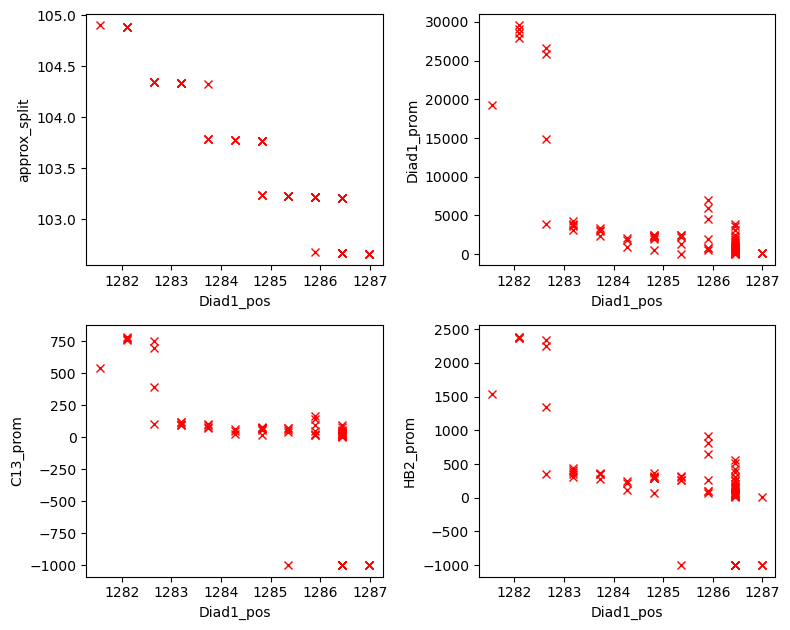

In [11]:
fig=pf.plot_peak_params(fit_params=fit_params, 
                     x_param='Diad1_pos',  y1_param='approx_split',
                    y2_param='Diad1_prom', y3_param='C13_prom',
                    y4_param='HB2_prom', fill_na=-1000)

### Filter out ones with really bad splitting or really low diad prominence

Keeping N=86
Discarding N=0


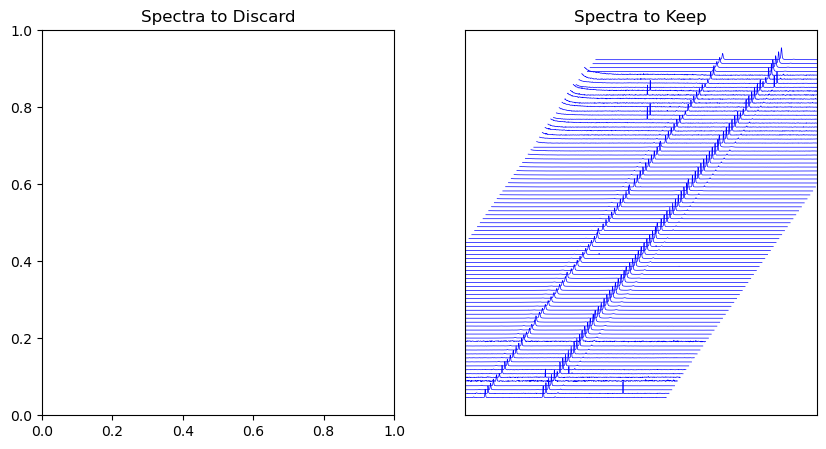

In [12]:
fit_params_filt, data_y_filt, fit_params_disc, data_y_disc=pf.filter_splitting_prominence(
fit_params=fit_params, data_y_all=data_y_all, x_cord=Diad[:, 0],
splitting_limits=[101, 108], lower_diad1_prom=10)

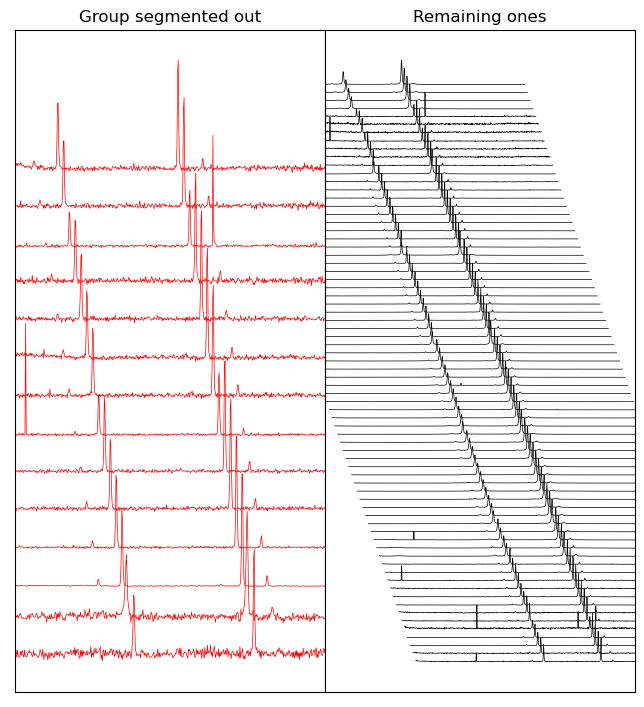

In [13]:
filter_bool=(fit_params['Diad1_pos']<1287)&(~(fit_params['HB2_prom']>0))

fit_params_Weak, fit_params_NotWeak, data_y_Weak, data_y_NotWeak=pf.identify_diad_group(fit_params=fit_params_filt, 
                        data_y=data_y_filt, 
                        x_cord=Diad[:, 0], 
                        filter_bool=filter_bool)

## Same for strong diads

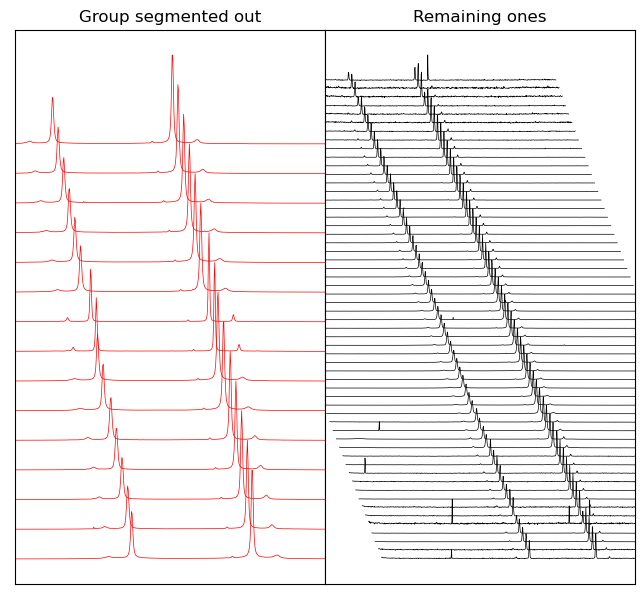

In [16]:
filter_bool_Strong=(fit_params_NotWeak['C13_prom']>100) #&(~(fit_params['HB2_prom']>0))

fit_params_Strong, fit_params_Medium, data_y_Strong, data_y_Medium=pf.identify_diad_group(
    fit_params=fit_params_NotWeak.reset_index(drop=True), 
                        data_y=data_y_NotWeak, 
                        x_cord=Diad[:, 0], 
                        filter_bool=filter_bool_Strong)

## Plot them all 

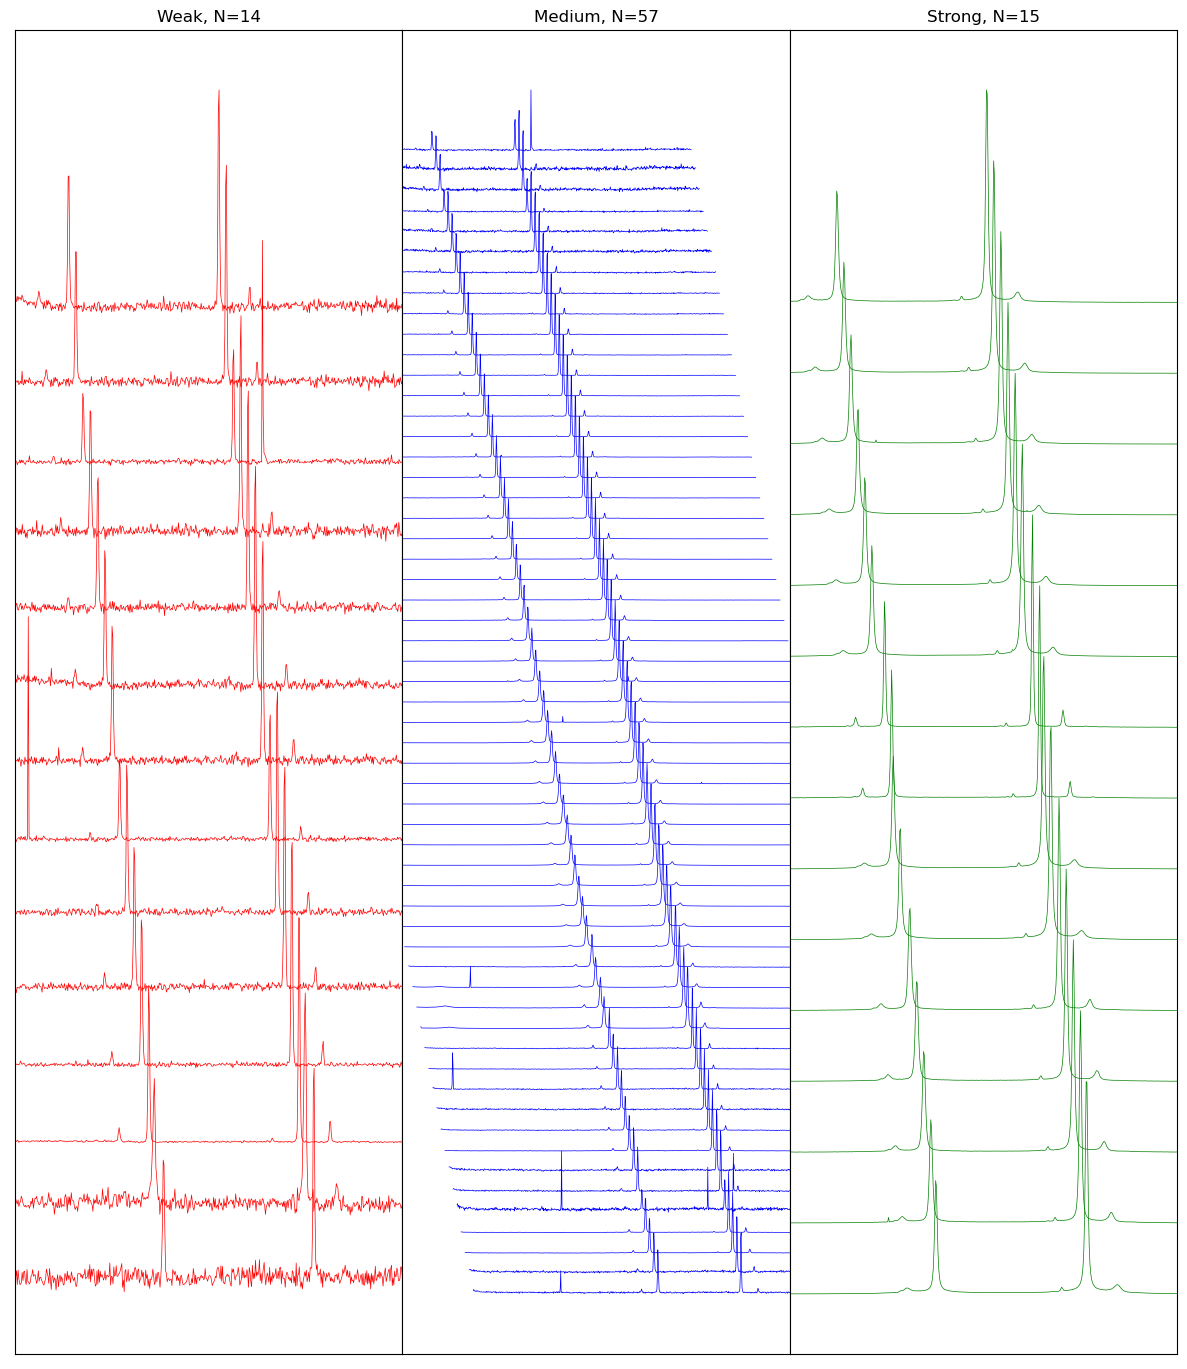

In [17]:
pf.plot_diad_groups( x_cord=Diad[:, 0], Weak_np=data_y_Weak,
                 Medium_np=data_y_Medium, Strong_np=data_y_Strong)

## Now lets save these lists, and we load them in another notebook

In [18]:
import joblib

joblib.dump(fit_params_Weak.reset_index(drop=True), 'Weak_df.sav')
joblib.dump(fit_params_Medium.reset_index(drop=True), 'Medium_df.sav')
joblib.dump(fit_params_Strong.reset_index(drop=True), 'Strong_df.sav')
fit_params_disc.to_excel('Discarded_df.xlsx')
